データ読み込み完了。
特徴量の数: 231
総試行（サンプル）数: 14400
個体数 (グループ数): 8
クラス分布 (0=WT, 1=Het):
phenotype_mapped
0    7200
1    7200
Name: count, dtype: int64

Leave-One-Group-Out CV を開始します (分割数: 8)

--- モデル1: ランダムフォレスト ---
ランダムフォレスト CV 正解率 (Accuracy):
  各Fold: [0.52888889 0.31833333 0.48555556 0.12944444 0.44166667 0.695
 0.83833333 0.18      ]
  平均: 0.4522 +/- 0.2268
ランダムフォレスト CV AUC:
  各Fold: [nan nan nan nan nan nan nan nan]
  平均: nan +/- nan

全データで最終モデルを学習し、特徴量の重要度を抽出します...


C:\Users\dmasu\AppData\Local\Temp\ipykernel_11696\645448767.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\dmasu\AppData\Local\Temp\ipykernel_11696\645448767.py:94: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dmasu\AppData\Local\Temp\ipykernel_11696\645448767.py:94: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dmasu\AppData\Local\Temp\ipykernel_11696\645448767.py:94: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dmasu\AppData\Local\Temp\ipykernel_11696\645448767.py:94: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dmasu\

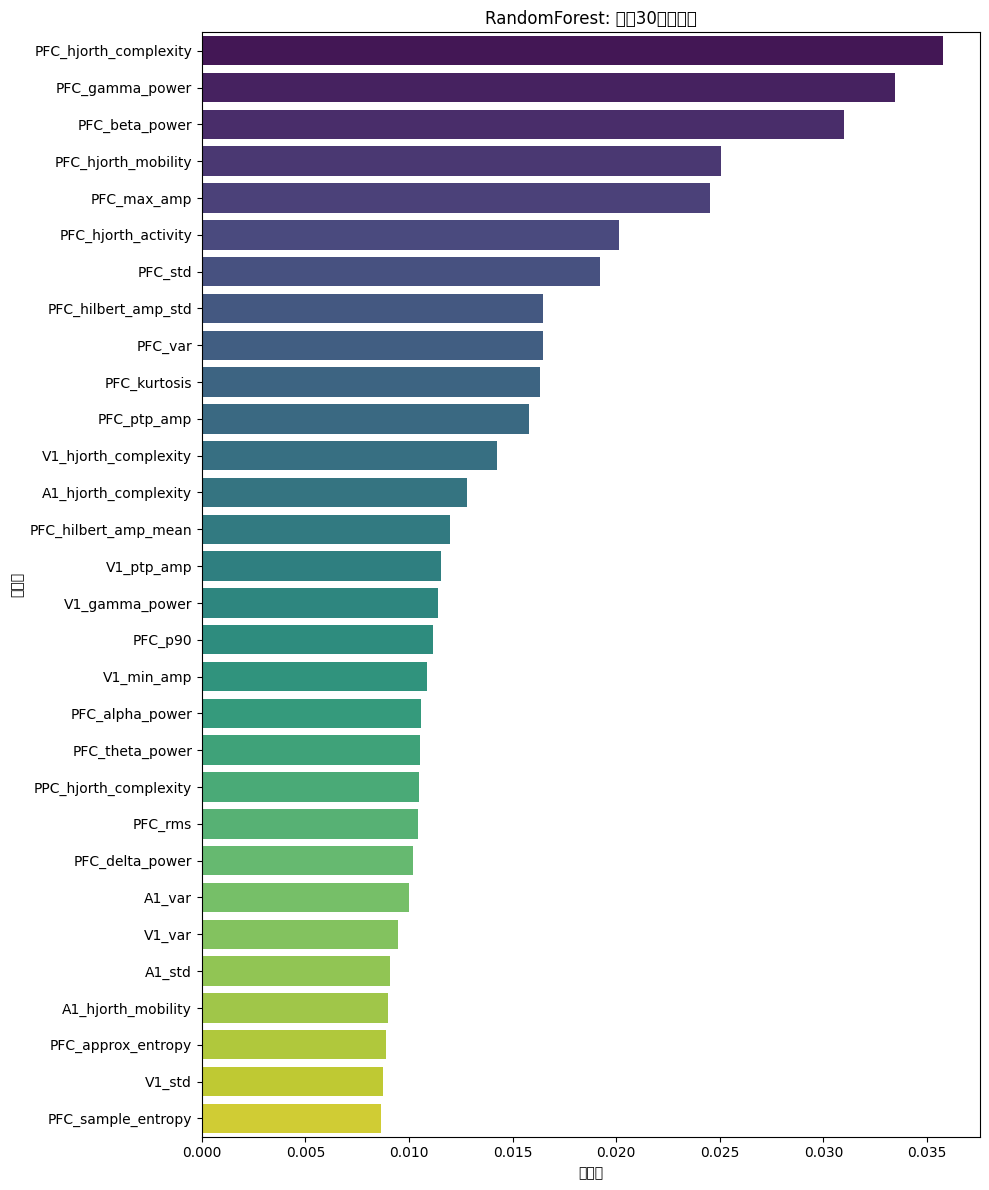


--- モデル2: LassoCV (特徴量選択) ---
全データでLassoCVを学習し、特徴量選択を行います...


c:\Users\dmasu\OneDrive\デスクトップ\pcdh_analyze\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.669e-01, tolerance: 2.700e-01
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\dmasu\OneDrive\デスクトップ\pcdh_analyze\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.289e-01, tolerance: 2.880e-01
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\dmasu\OneDrive\デスクトップ\pcdh_analyze\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of th

LassoCVによって選択された最適な Alpha: 0.002194
Lassoによって選択された特徴量の数 (係数が0でない): 103 / 231


C:\Users\dmasu\AppData\Local\Temp\ipykernel_11696\645448767.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\dmasu\AppData\Local\Temp\ipykernel_11696\645448767.py:94: UserWarning: Glyph 20418 (\N{CJK UNIFIED IDEOGRAPH-4FC2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dmasu\AppData\Local\Temp\ipykernel_11696\645448767.py:94: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dmasu\AppData\Local\Temp\ipykernel_11696\645448767.py:94: UserWarning: Glyph 32118 (\N{CJK UNIFIED IDEOGRAPH-7D76}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dmasu\AppData\Local\Temp\ipykernel_11696\645448767.py:94: UserWarning: Glyph 23550 (\N{CJK UNIFIED IDEOGRAPH-5BFE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dmasu\

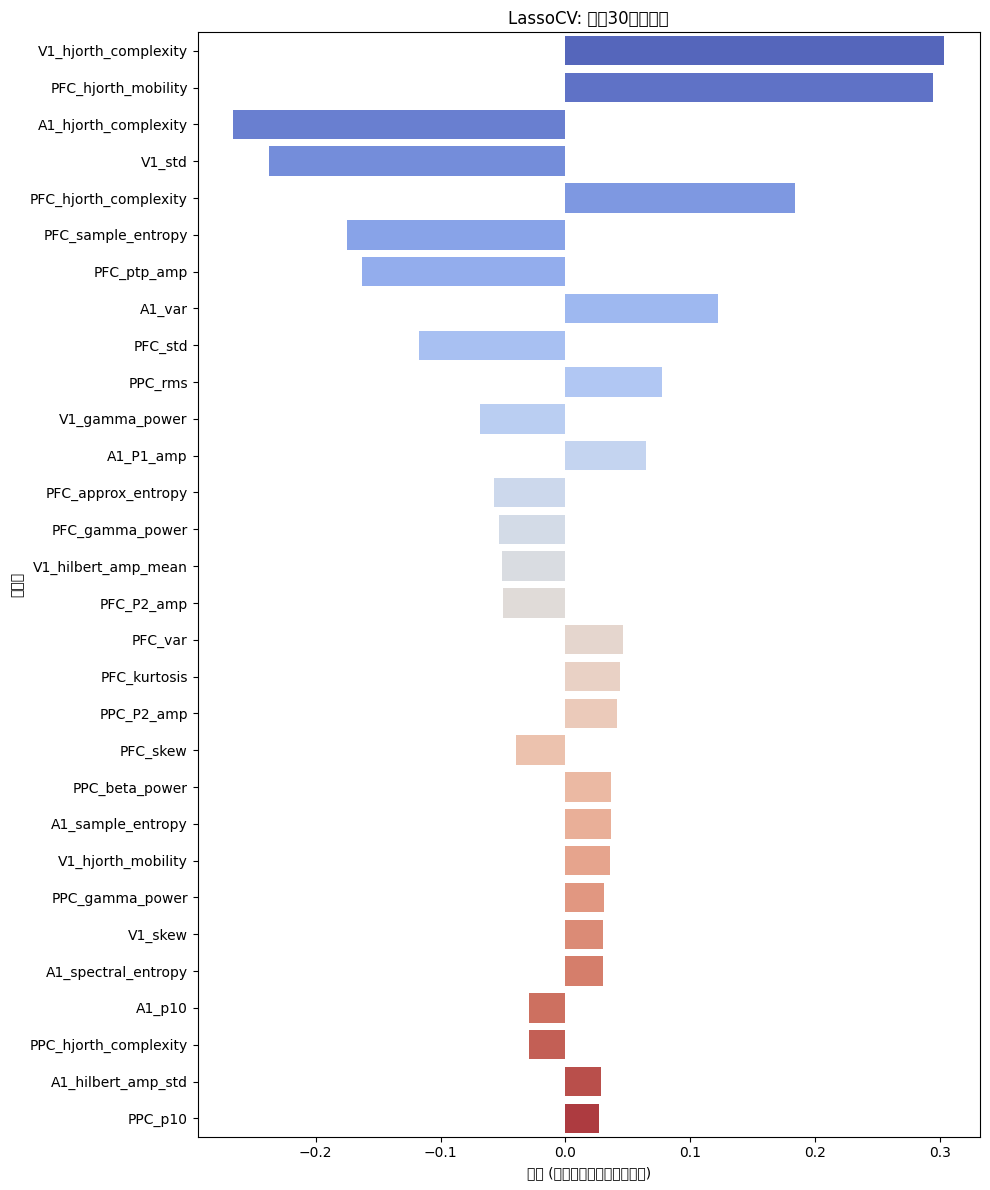

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learnライブラリ
from sklearn.model_selection import LeaveOneGroupOut, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LassoCV


def load_and_preprocess_data(file_path):
    """
    CSVファイルをロードし、機械学習用に前処理を行う関数。
    """
    try:
        df = pd.read_csv(file_path)
    except FileNotFoundError:
        print(f"エラー: ファイルが見つかりません。パスを確認してください: {file_path}")
        return None, None, None, None

    # 1. 'stim_type'をワンホットエンコーディング
    df_processed = pd.get_dummies(df, columns=['stim_type'], drop_first=False)

    # 2. ターゲット変数 (y) の作成 (WT=0, Het=1)
    # 'phenotype'列に 'WT' または 'Het' が含まれていると仮定
    if 'phenotype' not in df_processed.columns:
        print("エラー: 'phenotype'列がCSVにありません。")
        return None, None, None, None
        
    # 'WT'か'Het'かだけで判定するようにする（例：'wt262avsWT' -> 0）
    df_processed['phenotype_mapped'] = df_processed['phenotype'].apply(lambda x: 0 if 'WT' in str(x) else 1)
    y = df_processed['phenotype_mapped']

    # 3. グループ変数 (groups) の作成
    if 'mouse_id' not in df_processed.columns:
        print("エラー: 'mouse_id'列がCSVにありません。")
        return None, None, None, None
        
    groups = df_processed['mouse_id']

    # 4. 特徴量 (X) の作成
    # 元の列とマッピング後の列、ID列をドロップ
    drop_cols = ['phenotype', 'phenotype_mapped', 'mouse_id', 'trial']
    # 存在しない列をドロップリストから除外 (例: 'trial' がない場合など)
    drop_cols_existing = [col for col in drop_cols if col in df_processed.columns]
    
    X = df_processed.drop(columns=drop_cols_existing)
    
    # 特徴量名を取得
    feature_names = X.columns.to_list()

    print(f"データ読み込み完了。")
    print(f"特徴量の数: {len(feature_names)}")
    print(f"総試行（サンプル）数: {len(y)}")
    print(f"個体数 (グループ数): {len(groups.unique())}")
    print(f"クラス分布 (0=WT, 1=Het):\n{y.value_counts()}")
    
    return X, y, groups, feature_names

def plot_feature_importances(importances, names, model_name, top_n=20):
    """
    特徴量の重要度を可視化する関数。
    """
    # 重要度をDataFrameにまとめる
    feature_importances = pd.DataFrame({'feature': names, 'importance': importances})
    
    # Lassoの場合、係数が0のものは除外
    if model_name == 'LassoCV':
        feature_importances = feature_importances[feature_importances['importance'] != 0]
        # 係数の絶対値でソート
        feature_importances['importance_abs'] = feature_importances['importance'].abs()
        feature_importances = feature_importances.sort_values(by='importance_abs', ascending=False)
    else:
        # ランダムフォレストはそのままソート
        feature_importances = feature_importances.sort_values(by='importance', ascending=False)

    # 上位top_n件を抽出
    top_features = feature_importances.head(top_n)

    plt.figure(figsize=(10, top_n * 0.4))
    sns.barplot(
        x='importance', 
        y='feature', 
        data=top_features,
        palette='viridis' if model_name == 'RandomForest' else 'coolwarm'
    )
    plt.title(f'{model_name}: 上位{top_n}の特徴量')
    plt.xlabel('重要度' if model_name == 'RandomForest' else '係数 (絶対値が大きいほど重要)')
    plt.ylabel('特徴量')
    plt.tight_layout()
    plt.show()


# --- メインの実行 ---
# 2. データのロードと前処理
# G:/マイドライブ/df_all.csv を指定
FILE_PATH = 'G:/マイドライブ/df_all.csv'
X, y, groups, feature_names = load_and_preprocess_data(FILE_PATH)

if X is not None:
    # 3. Leave-One-Group-Out (LOGO) CVの準備
    logo = LeaveOneGroupOut()
    n_splits = logo.get_n_splits(groups=groups)
    print(f"\nLeave-One-Group-Out CV を開始します (分割数: {n_splits})")

    # --- モデル1: ランダムフォレスト ---
    print("\n--- モデル1: ランダムフォレスト ---")
    
    # パイプラインの定義: 
    # 1. 欠損値補完 (平均値)
    # 2. 標準化
    # 3. ランダムフォレスト分類器
    rf_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))
    ])

    # LOGO-CVの実行
    # 'accuracy' (正解率) と 'roc_auc' (AUC) を評価
    cv_scores_rf = cross_validate(
        rf_pipeline, X, y, groups=groups, cv=logo, 
        scoring=['accuracy', 'roc_auc'], n_jobs=-1
    )

    print(f"ランダムフォレスト CV 正解率 (Accuracy):")
    print(f"  各Fold: {cv_scores_rf['test_accuracy']}")
    print(f"  平均: {cv_scores_rf['test_accuracy'].mean():.4f} +/- {cv_scores_rf['test_accuracy'].std():.4f}")
    
    print(f"ランダムフォレスト CV AUC:")
    print(f"  各Fold: {cv_scores_rf['test_roc_auc']}")
    print(f"  平均: {cv_scores_rf['test_roc_auc'].mean():.4f} +/- {cv_scores_rf['test_roc_auc'].std():.4f}")

    # 特徴量重要度を計算するために、全データで再学習
    print("\n全データで最終モデルを学習し、特徴量の重要度を抽出します...")
    rf_pipeline.fit(X, y)

    # 重要度を取得
    importances_rf = rf_pipeline.named_steps['classifier'].feature_importances_
    
    # 可視化
    plot_feature_importances(importances_rf, feature_names, "RandomForest", top_n=30)


    # --- モデル2: LassoCV (L1正則化による特徴量選択) ---
    print("\n--- モデル2: LassoCV (特徴量選択) ---")
    
    # パイプラインの定義
    # LassoCVは内部でCVを使い、最適な正則化強度(alpha)を自動選択する
    lasso_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('classifier', LassoCV(cv=5, random_state=42, n_jobs=-1, max_iter=5000))
    ])

    # LOGO-CVの実行 (Lassoは分類器ではないため、AUCは直接計算が難しい。ここでは正解率のみ)
    # Lassoの出力は連続値なので、0.5を閾値として分類する評価は厳密には推奨されないが、
    # ここでは分類タスクとしてのアプローチで進める
    
    # Lassoは回帰モデルのため、cross_validateで'accuracy'を使うのは難しい。
    # 代わりに、LassoCVで全データを用いて学習し、特徴量選択の結果（係数）を見ることに集中する。
    
    print("全データでLassoCVを学習し、特徴量選択を行います...")
    # y (0/1) をそのままターゲットとして学習
    lasso_pipeline.fit(X, y)
    
    # 選択されたAlpha
    best_alpha = lasso_pipeline.named_steps['classifier'].alpha_
    print(f"LassoCVによって選択された最適な Alpha: {best_alpha:.6f}")

    # 係数を取得
    importances_lasso = lasso_pipeline.named_steps['classifier'].coef_
    
    non_zero_features = np.sum(importances_lasso != 0)
    print(f"Lassoによって選択された特徴量の数 (係数が0でない): {non_zero_features} / {len(feature_names)}")

    # 可視化
    plot_feature_importances(importances_lasso, feature_names, "LassoCV", top_n=30)

else:
    print("\nデータのロードに失敗したため、処理を中断しました。")


--- モデル2 (高速版): SGDClassifier (L1正則化) ---
SGDClassifier (L1) CV 正解率 (Accuracy):
  各Fold: [0.27888889 0.30666667 0.53166667 0.775      0.75833333 0.79555556
 0.59166667 0.38111111]
  平均: 0.5524 +/- 0.1992

全データで最終モデルを学習し、特徴量の係数を抽出します...
SGDClassifier (L1) によって選択された特徴量の数 (係数が0でない): 158 / 231


C:\Users\dmasu\AppData\Local\Temp\ipykernel_11696\645448767.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\dmasu\AppData\Local\Temp\ipykernel_11696\645448767.py:94: UserWarning: Glyph 20418 (\N{CJK UNIFIED IDEOGRAPH-4FC2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dmasu\AppData\Local\Temp\ipykernel_11696\645448767.py:94: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dmasu\AppData\Local\Temp\ipykernel_11696\645448767.py:94: UserWarning: Glyph 32118 (\N{CJK UNIFIED IDEOGRAPH-7D76}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dmasu\AppData\Local\Temp\ipykernel_11696\645448767.py:94: UserWarning: Glyph 23550 (\N{CJK UNIFIED IDEOGRAPH-5BFE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dmasu\

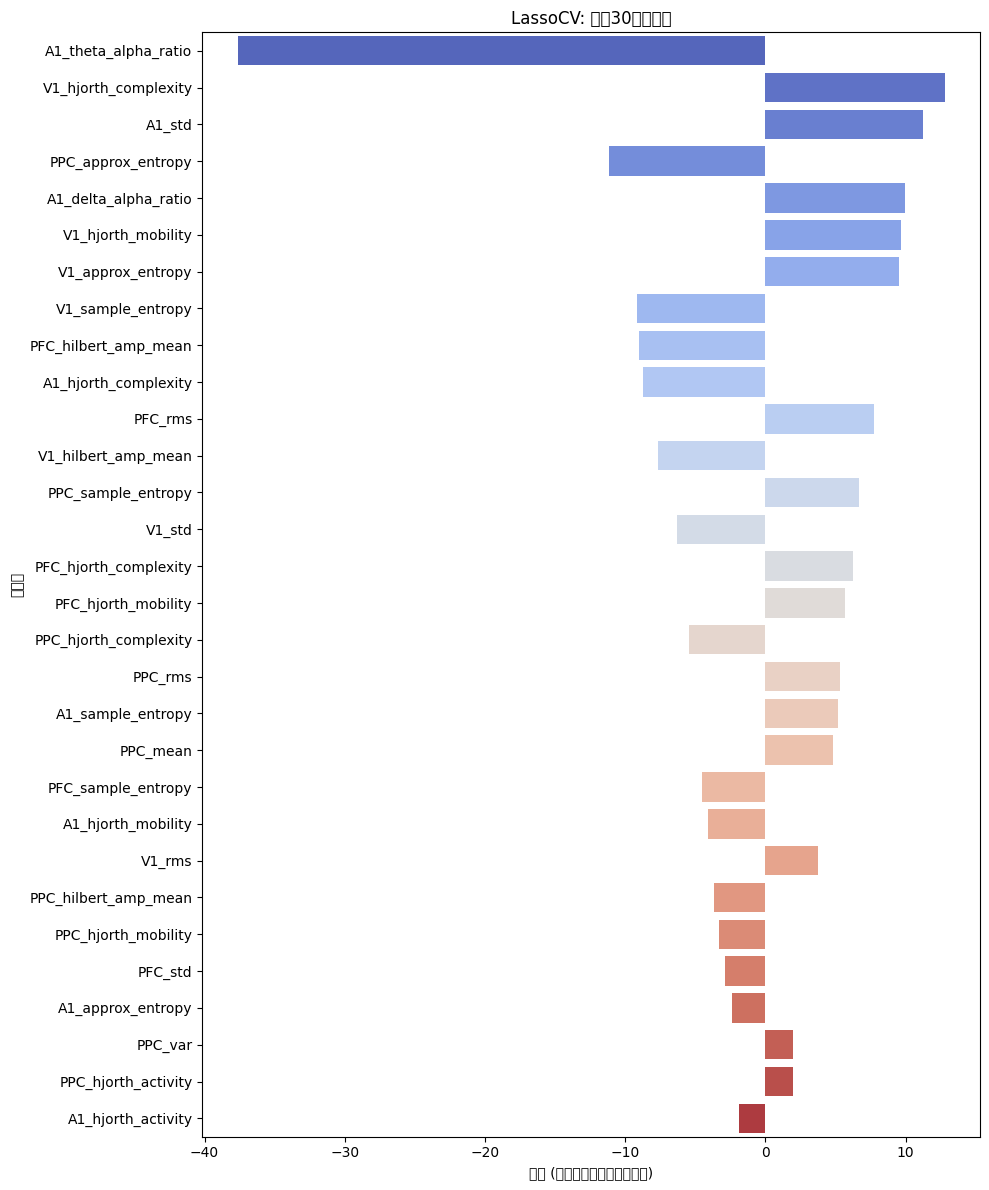

In [6]:
# --- モデル2 (高速版): SGDClassifier (L1正則化) ---
print("\n--- モデル2 (高速版): SGDClassifier (L1正則化) ---")

from sklearn.linear_model import SGDClassifier

# パイプラインの定義: 
# 1. 欠損値補完 (平均値)
# 2. 標準化
# 3. SGDClassifier (L1正則化を使用, 高速に動作)
sgd_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('classifier', SGDClassifier(loss='hinge', penalty='l1', random_state=42, max_iter=1000, tol=1e-3, n_jobs=-1))
])

# LOGO-CVの実行 (scoring='accuracy' のみ)
try:
    cv_scores_sgd = cross_validate(
        sgd_pipeline, X, y, groups=groups, cv=logo, 
        scoring=['accuracy'], n_jobs=-1 # roc_aucを削除
    )

    print(f"SGDClassifier (L1) CV 正解率 (Accuracy):")
    print(f"  各Fold: {cv_scores_sgd['test_accuracy']}")
    print(f"  平均: {cv_scores_sgd['test_accuracy'].mean():.4f} +/- {cv_scores_sgd['test_accuracy'].std():.4f}")

except ValueError as e:
    print(f"エラー: CV中のスコア計算で問題が発生しました。{e}")

# 特徴量重要度（係数）を計算するために、全データで再学習
print("\n全データで最終モデルを学習し、特徴量の係数を抽出します...")
sgd_pipeline.fit(X, y)

# 係数を取得
importances_sgd = sgd_pipeline.named_steps['classifier'].coef_[0]

non_zero_features = np.sum(importances_sgd != 0)
print(f"SGDClassifier (L1) によって選択された特徴量の数 (係数が0でない): {non_zero_features} / {len(feature_names)}")

# 可視化 (plot_feature_importances関数を流用)
plot_feature_importances(importances_sgd, feature_names, "LassoCV", top_n=30)


--- モデル3: フィルター法 (SelectKBest + SVM) ---
先に特徴量を30個選択し、その後SVMで分類します。
リーケージを防ぐため、Pipeline内で実行します。

SelectKBest(k=30) + SVC CV 正解率 (Accuracy):
  各Fold: [0.52944444 0.29666667 0.73111111 0.51222222 0.63888889 0.67222222
 0.61222222 0.25222222]
  平均: 0.5306 +/- 0.1625
SelectKBest(k=30) + SVC CV AUC:
  各Fold: [nan nan nan nan nan nan nan nan]
  平均: nan +/- nan

全データを使用して、ANOVA F値に基づく上位30個のバイオマーカー候補を抽出します...


c:\Users\dmasu\OneDrive\デスクトップ\pcdh_analyze\venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [ 20  21  22  23  64  65  66  67 208 209 210 211] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\dmasu\OneDrive\デスクトップ\pcdh_analyze\venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


SelectKBest (f_classif) によって選択された上位30個の特徴量:
                  feature  F-value (Score)        p-value
3         PFC_gamma_power      1525.404126  3.108636e-317
8    A1_hjorth_complexity      1364.786420  1.626154e-285
12    PFC_hjorth_mobility      1243.612796  2.274086e-261
2          PFC_beta_power       921.409890  3.108868e-196
1         PFC_alpha_power       907.784135  1.895432e-193
22    A1_spectral_entropy       850.519728  1.023880e-181
5          V1_gamma_power       825.544871  1.384448e-176
27        PFC_theta_power       744.307520  7.781846e-160
11     A1_hjorth_mobility       738.946157  9.994176e-159
21               PFC_skew       680.285877  1.433632e-146
14     V1_hjorth_mobility       648.408047  6.070729e-140
10   V1_hjorth_complexity       623.428366  9.687547e-135
13    PPC_hjorth_mobility       608.696395  1.145305e-131
9   PPC_hjorth_complexity       546.213223  1.337629e-118
16            PFC_max_amp       521.471004  2.073127e-113
26                 V1_std   

C:\Users\dmasu\AppData\Local\Temp\ipykernel_11696\3347596722.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\dmasu\AppData\Local\Temp\ipykernel_11696\3347596722.py:90: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dmasu\AppData\Local\Temp\ipykernel_11696\3347596722.py:90: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dmasu\AppData\Local\Temp\ipykernel_11696\3347596722.py:90: UserWarning: Glyph 32676 (\N{CJK UNIFIED IDEOGRAPH-7FA4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dmasu\AppData\Local\Temp\ipykernel_11696\3347596722.py:90: UserWarning: Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH-9593}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dmasu\App

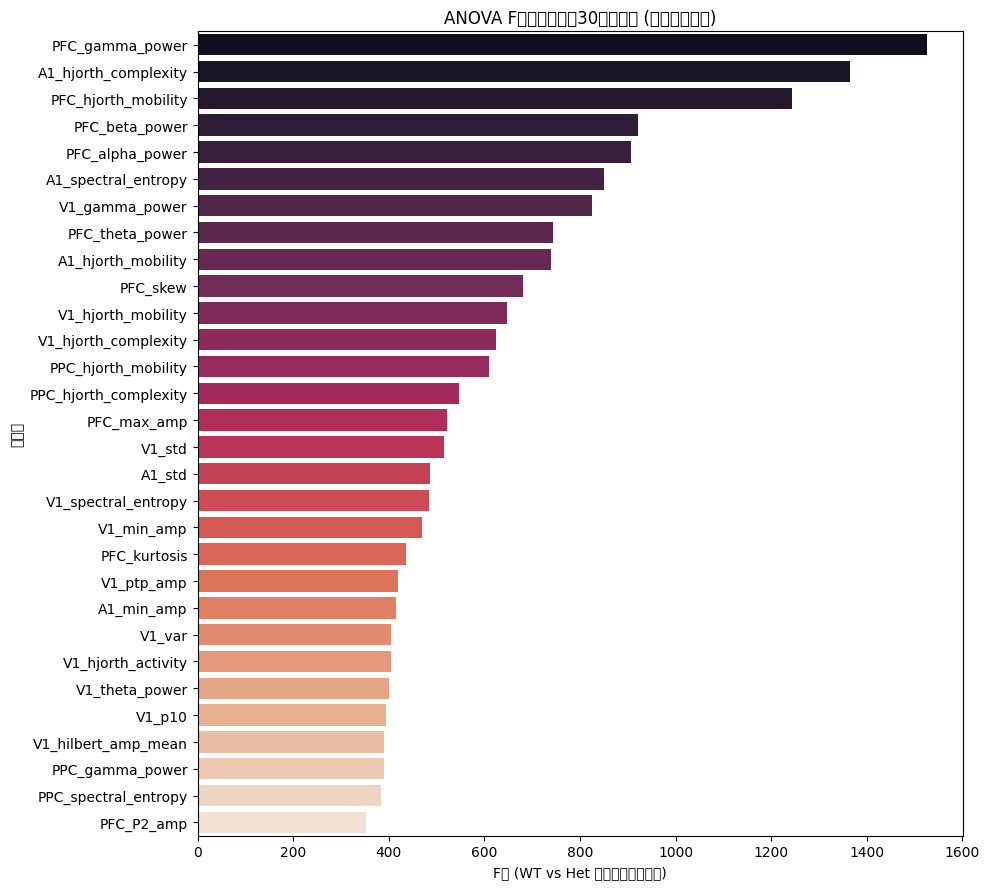

In [5]:
# --- モデル3: フィルター法 (SelectKBest + SVM) ---
print("\n--- モデル3: フィルター法 (SelectKBest + SVM) ---")
print("先に特徴量を30個選択し、その後SVMで分類します。")
print("リーケージを防ぐため、Pipeline内で実行します。")

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC

# 選択する特徴量の数
K_FEATURES = 30

# パイプラインの定義: 
# 1. 欠損値補完 (平均値)
# 2. 標準化
# 3. 特徴量選択 (SelectKBest): ANOVA F値で上位30個を選択
# 4. SVM分類器 (線形カーネル)
filter_svm_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif, k=K_FEATURES)),
    ('classifier', SVC(kernel='linear', probability=True, random_state=42)) # probability=TrueでAUC計算可能
])

# LOGO-CVの実行
try:
    cv_scores_filter_svm = cross_validate(
        filter_svm_pipeline, X, y, groups=groups, cv=logo, 
        scoring=['accuracy', 'roc_auc'], n_jobs=-1
    )

    print(f"\nSelectKBest(k={K_FEATURES}) + SVC CV 正解率 (Accuracy):")
    print(f"  各Fold: {cv_scores_filter_svm['test_accuracy']}")
    print(f"  平均: {cv_scores_filter_svm['test_accuracy'].mean():.4f} +/- {cv_scores_filter_svm['test_accuracy'].std():.4f}")
    
    print(f"SelectKBest(k={K_FEATURES}) + SVC CV AUC:")
    print(f"  各Fold: {cv_scores_filter_svm['test_roc_auc']}")
    print(f"  平均: {cv_scores_filter_svm['test_roc_auc'].mean():.4f} +/- {cv_scores_filter_svm['test_roc_auc'].std():.4f}")

except ValueError as e:
    print(f"エラー: CV中のスコア計算で問題が発生しました。{e}")

# --- バイオマーカー候補の特定 ---
# CVでモデルの戦略が有効だと確認できた後、
# 「どの特徴量が選ばれたか」を報告するために、全データを使って
# 特徴量選択ステップのみを再度実行する。

print(f"\n全データを使用して、ANOVA F値に基づく上位{K_FEATURES}個のバイオマーカー候補を抽出します...")

# 選択ステップのみのパイプラインを作成
selector_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_classif, k=K_FEATURES))
])

# 全データでフィット
selector_pipeline.fit(X, y)

# 選択された特徴量のインデックスを取得
selected_indices = selector_pipeline.named_steps['selector'].get_support(indices=True)

# 選択された特徴量のスコア（F値）を取得
scores = selector_pipeline.named_steps['selector'].scores_[selected_indices]
pvalues = selector_pipeline.named_steps['selector'].pvalues_[selected_indices]

# 特徴量名を取得
selected_feature_names = [feature_names[i] for i in selected_indices]

# 結果をDataFrameにまとめる
selected_features_df = pd.DataFrame({
    'feature': selected_feature_names,
    'F-value (Score)': scores,
    'p-value': pvalues
}).sort_values(by='F-value (Score)', ascending=False)

print(f"SelectKBest (f_classif) によって選択された上位{K_FEATURES}個の特徴量:")
print(selected_features_df)

# 結果の可視化
plt.figure(figsize=(10, K_FEATURES * 0.3))
sns.barplot(
    x='F-value (Score)', 
    y='feature', 
    data=selected_features_df,
    palette='rocket'
)
plt.title(f'ANOVA F値による上位{K_FEATURES}の特徴量 (全データ使用)')
plt.xlabel('F値 (WT vs Het の群間差の大きさ)')
plt.ylabel('特徴量')
plt.tight_layout()
plt.show()